<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 8. <b>Классификация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Генерация данных</a></li>
        <li><a href="#2">Классификация с линейной регрессией</a></li>
        <li><a href="#3">Логистическая регрессия</a>
        <li><a href="#4">Наивный байесовский классификатор</a>
        <li><a href="#5">Метод опорных векторов (SVM)</a>
        <li><a href="#6">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подключение библиотек</b></p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

from matplotlib.colors import ListedColormap
from matplotlib import cm

In [3]:
from sklearn import linear_model
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Генерация данных</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [4]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

In [5]:
clrMap = ListedColormap(["blue", "red", "green"])

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification">make_classification</a>

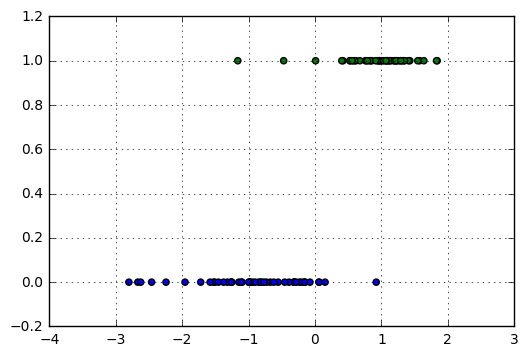

In [6]:
X, Y = make_classification(n_samples=100, n_features=1, n_redundant=0, n_informative=1, n_classes=2, 
                           n_clusters_per_class=1, class_sep=1, random_state=1234)
plt.scatter(X, Y, c=Y, cmap=clrMap)
plt.grid(True)
plt.show()

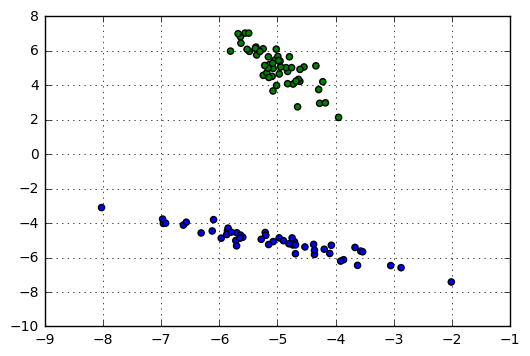

In [7]:
X, Y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=5,
                           random_state=1234)

plt.scatter(X[:,0], X[:,1], c=Y, cmap=clrMap)
plt.grid(True)
plt.show()

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs">make_blobs</a>

In [8]:
from sklearn.datasets import make_blobs

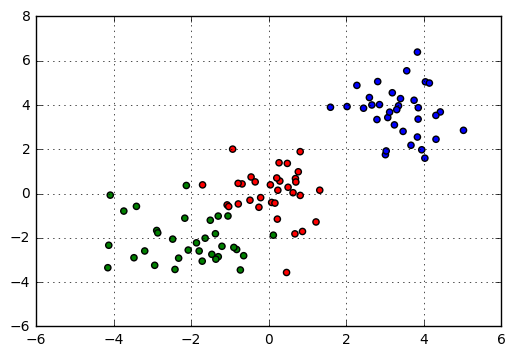

In [9]:
X1, Y1 = make_blobs(n_samples=100, n_features=2, centers=[[3,4], [0,0], [-2,-2]], cluster_std=1, 
                    center_box=(-5,5), random_state=1234)

plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap=clrMap)
plt.grid(True)
plt.show()

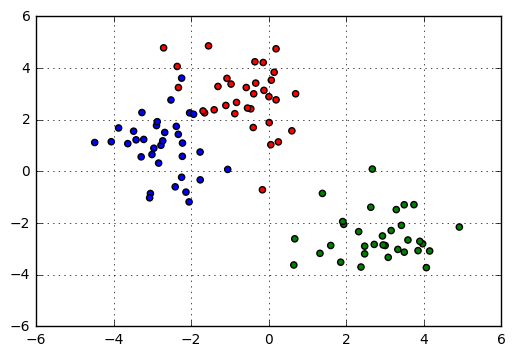

In [10]:
X1, Y1 = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
                    center_box=(-5,5), random_state=1234)

plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap=clrMap)
plt.grid(True)
plt.show()

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html#sklearn.datasets.make_gaussian_quantiles">make_gaussian_quantiles</a>

In [11]:
from sklearn.datasets import make_gaussian_quantiles

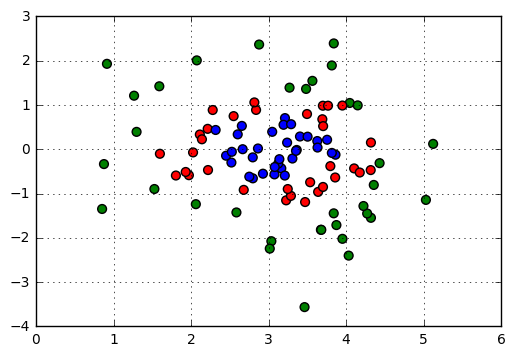

In [12]:
X1, Y1 = make_gaussian_quantiles(n_samples=100, mean=(3,0), n_features=2, n_classes=3, random_state=1234)
plt.scatter(X1[:,0], X1[:,1], marker='o', s=40, c=Y1, cmap=clrMap)
plt.grid(True)
plt.show()

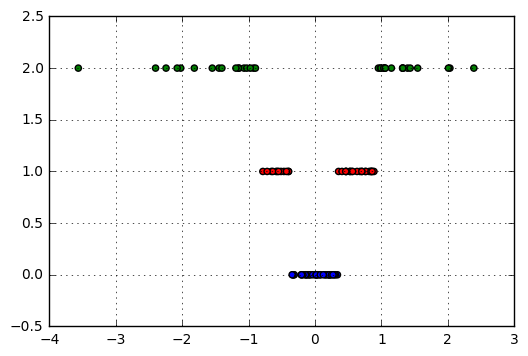

In [13]:
X, Y = make_gaussian_quantiles(n_samples=100, n_features=1, n_classes=3, random_state=1234)

plt.scatter(X, Y, c=Y, cmap=clrMap)
plt.grid(True)
plt.show()

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons">make_moons</a>

In [14]:
from sklearn.datasets import make_moons

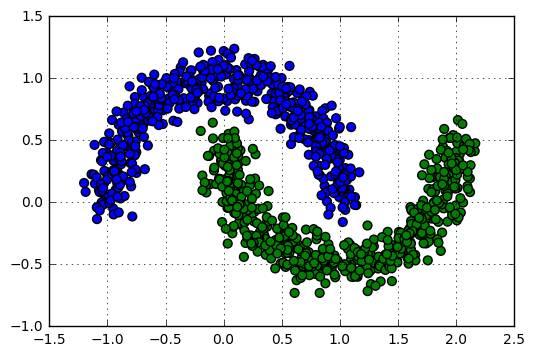

In [15]:
X1, Y1 = make_moons(n_samples=1100, noise=0.1, random_state=1384)
plt.scatter(X1[:,0], X1[:,1], marker='o', s=40, c=Y1, cmap=clrMap)
plt.grid(True)
plt.show()

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles">make_circles</a>

In [16]:
from sklearn.datasets import make_circles

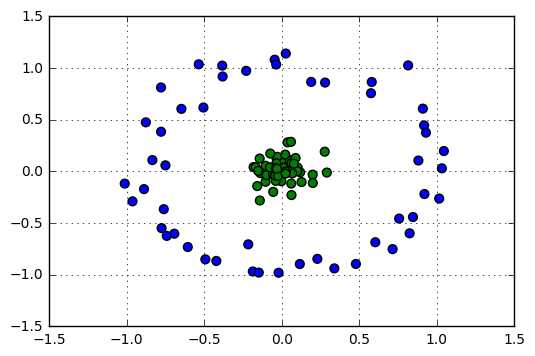

In [17]:
X1, Y1 = make_circles(n_samples=100, noise=0.1, factor=0.1, random_state=1234)
plt.scatter(X1[:,0], X1[:,1], marker='o', s=40, c=Y1, cmap=clrMap)
plt.grid(True)
plt.show()

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Классификация с линейной регрессией</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [18]:
from sklearn import linear_model
from matplotlib import cm

<p><b>1D</b></p>

<p><b>Исходные данные</b></p>

In [19]:
n = 100
x, y = make_classification(n_samples=n, n_features=1, n_redundant=0, n_informative=1, n_classes=2, n_clusters_per_class=1, 
                           class_sep=1, random_state=1000)

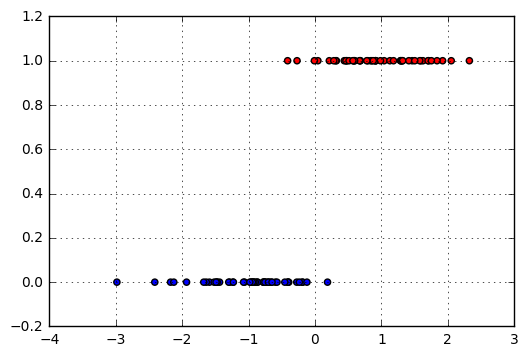

In [20]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x, y, c=y, cmap=clrMap)
plt.grid(True)
plt.show()

In [21]:
#Опционально
#count = 0
#while count < 20:
#    indx = np.random.randint(low=0, high=len(x), size=1)
#    
#    if y[indx] > 0:
#        x[indx,0] += 10
#        count += 1

In [22]:
#plt.scatter(x, y, c=y, cmap=clrMap)
#plt.grid(True)
#plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [23]:
tr_pr = 0.7
tr_n = int(np.round(tr_pr*n))

x_train = x[:tr_n]
x_test = x[tr_n:]

y_train = y[:tr_n]
y_test = y[tr_n:]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [26]:
linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
linReg.coef_, linReg.intercept_

(array([ 0.3658681]), 0.5102641461110019)

In [28]:
threshold = 0.5

In [29]:
predTrainVals = np.where(linReg.predict(x_train)>=threshold, 1, 0)
predTrainVals

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0])

In [30]:
(threshold - linReg.intercept_)/linReg.coef_

array([-0.02805423])

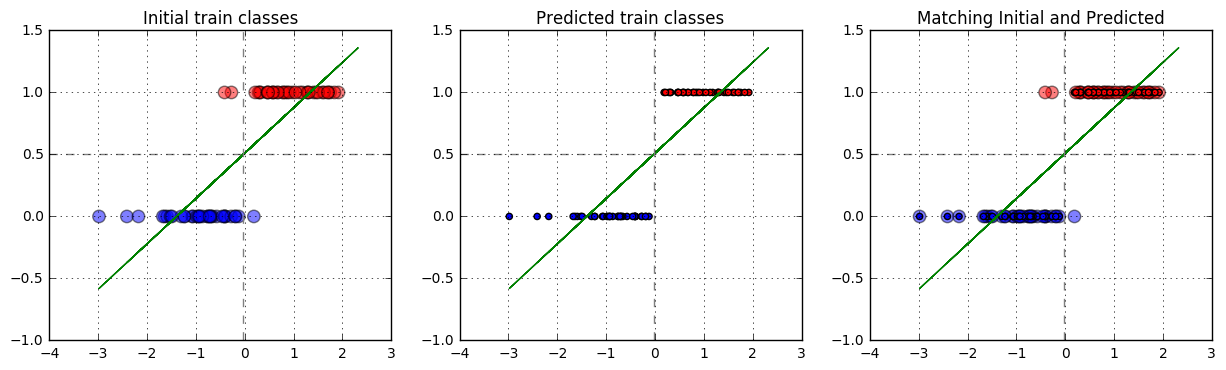

In [31]:
clrMap = ListedColormap(["blue", "red"])

def plotLinRegTrain():
    plt.figure(1, figsize=[15,4])

    plt.subplot(1,3,1)
    plt.title("Initial train classes")
    plt.scatter(x_train, y_train, c=y_train, cmap=clrMap, s=80, alpha=0.5)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,2)
    plt.title("Predicted train classes")
    plt.scatter(x_train, predTrainVals, s=20, c=predTrainVals, cmap=clrMap)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,3)
    plt.title("Matching Initial and Predicted")
    plt.scatter(x_train, y_train, c=y_train, cmap=clrMap, s=80, alpha=0.5)
    plt.scatter(x_train, predTrainVals, s=20, c=predTrainVals, cmap=clrMap)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)
    
plotLinRegTrain()
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

<p>Классификация для тестового набора</p>

In [32]:
predTestVals = np.where(linReg.predict(x_test)>=threshold, 1, 0)
predTestVals

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1])

<p>Показатель точности классификации</p>

In [33]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predTestVals[i]:
        count += 1
print(count/len(y_test))     

1.0


<p>Графики для тестового набора</p>

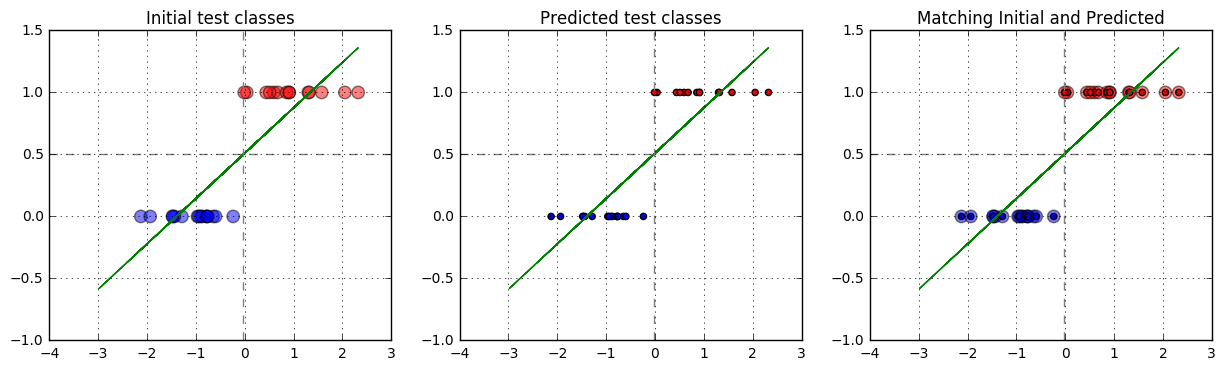

In [34]:
def plotLinRegTest():
    plt.figure(1, figsize=[15,4])

    plt.subplot(1,3,1)
    plt.title("Initial test classes")
    plt.scatter(x_test, y_test, c=y_test, cmap=clrMap, s=80, alpha=0.5)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,2)
    plt.title("Predicted test classes")
    plt.scatter(x_test, predTestVals, s=20, c=predTestVals, cmap=clrMap)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,3)
    plt.title("Matching Initial and Predicted")
    plt.scatter(x_test, y_test, c=y_test, cmap=clrMap, s=80, alpha=0.5)
    plt.scatter(x_test, predTestVals, s=20, c=predTestVals, cmap=clrMap)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)

plotLinRegTest()
plt.show()

<p><b>Графики</b></p>

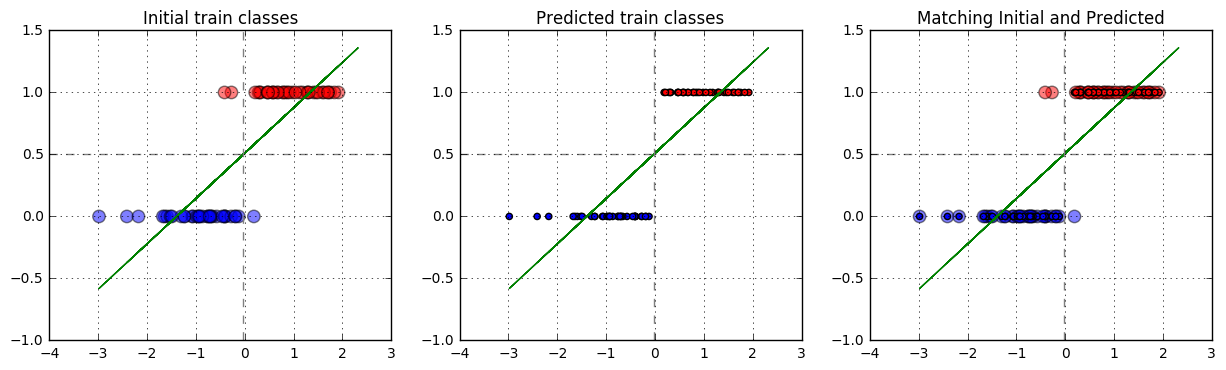

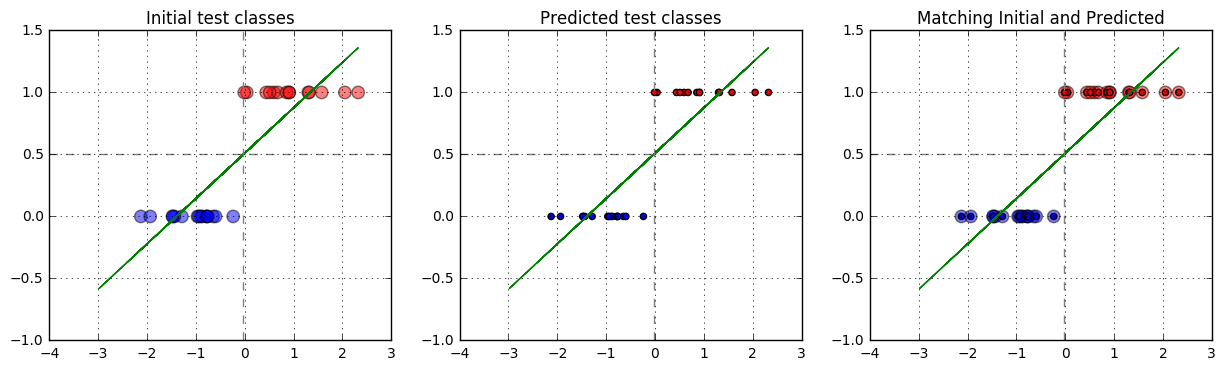

In [35]:
plotLinRegTrain()
plt.show()
plotLinRegTest()
plt.show()

<p><b>2D</b></p>

<p><b>Исходные данные</b></p>

In [36]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.25,
                           random_state=19)

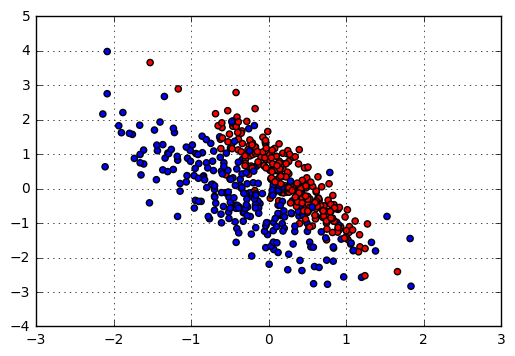

In [37]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [39]:
linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
threshold = 0.5

In [41]:
predTrainVals = np.where(linReg.predict(x_train)>=threshold, 1, 0)
predTrainVals

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1,

<p>Разделительная линия</p>

In [42]:
x1_range = np.linspace(x[:,0].min(), x[:,0].max(), 100)
x2_range = (threshold - linReg.intercept_ - linReg.coef_[0]*x1_range) / linReg.coef_[1]

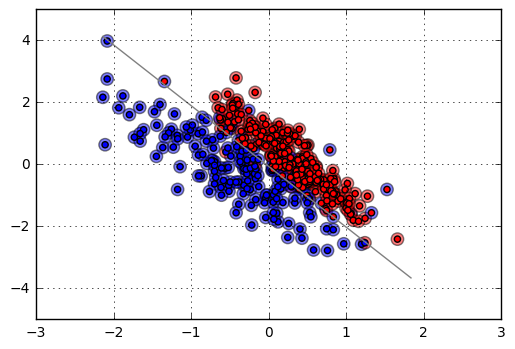

In [43]:
plt.plot(x1_range, x2_range, color="0.5")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:,1], c=predTrainVals, s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [44]:
predTestVals = np.where(linReg.predict(x_test)>=threshold, 1, 0)
predTestVals

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [45]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predTestVals[i]:
        count += 1
print(count/len(y_test))     

0.8666666666666667


In [46]:
h = lambda x: linReg.intercept_ + linReg.coef_[0]*x[0] + linReg.coef_[1]*x[1]

In [47]:
for i in range(len(x_test)):
    hVal = h(x_test[i,:])
    hVal = np.around(hVal, decimals=2)
    print("Point:", x_test[i,:])
    print("Class 0:", 1 - hVal, end="; ")
    print("Class 1:", hVal, end="; ")
    print("hVal:", hVal - threshold, end="; ")
    #print("Class 1:", hVal + 0.5, end="; ")
    print("Predicted Class:", predTestVals[i], end="; ")
    print("Actual Class:", y_test[i])

Point: [-1.30200217  0.49582786]
Class 0: 1.2; Class 1: -0.2; hVal: -0.7; Predicted Class: 0; Actual Class: 0
Point: [-0.40294816 -0.48750983]
Class 0: 0.92; Class 1: 0.08; hVal: -0.42; Predicted Class: 0; Actual Class: 0
Point: [-0.34451984  1.67632759]
Class 0: 0.13; Class 1: 0.87; hVal: 0.37; Predicted Class: 1; Actual Class: 1
Point: [-0.47518022  1.29477921]
Class 0: 0.35; Class 1: 0.65; hVal: 0.15; Predicted Class: 1; Actual Class: 1
Point: [ 0.93678084 -1.46494071]
Class 0: 0.35; Class 1: 0.65; hVal: 0.15; Predicted Class: 1; Actual Class: 0
Point: [ 0.83917805 -1.72459861]
Class 0: 0.51; Class 1: 0.49; hVal: -0.01; Predicted Class: 0; Actual Class: 0
Point: [-0.74538159  1.31501269]
Class 0: 0.53; Class 1: 0.47; hVal: -0.03; Predicted Class: 0; Actual Class: 0
Point: [-0.57688283  0.64329902]
Class 0: 0.65; Class 1: 0.35; hVal: -0.15; Predicted Class: 0; Actual Class: 0
Point: [ 0.16600127 -0.1134443 ]
Class 0: 0.4; Class 1: 0.6; hVal: 0.1; Predicted Class: 1; Actual Class: 1
P

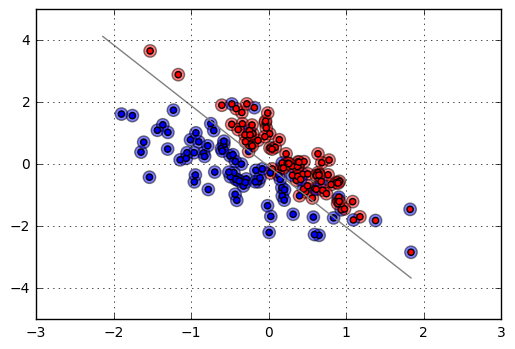

In [48]:
plt.plot(x1_range, x2_range, color="0.5")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=predTestVals, s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

In [49]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))

In [50]:
points = np.c_[xx.ravel(), yy.ravel()]
#Z = np.where(linReg.predict(points)>=threshold, 1, 0)
Z = linReg.predict(points)
Z = Z.reshape(xx.shape)

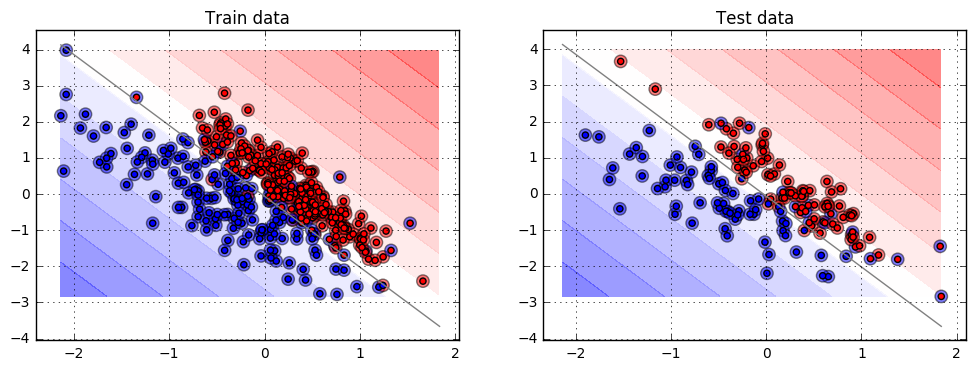

In [51]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, 15, cmap=cm.bwr, alpha=.5)
plt.plot(x1_range, x2_range, color="0.5")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:,1], c=predTrainVals, s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, 15, cmap=cm.bwr, alpha=.5)
plt.plot(x1_range, x2_range, color="0.5")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=predTestVals, s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Логистическая регрессия</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">
sklearn.linear_model.LogisticRegression</a>

<a href="http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression">
Logistic regression</a>

In [52]:
from sklearn import linear_model
from matplotlib import cm

<p><b>1D</b></p>

<p><b>Исходные данные</b></p>

In [53]:
n = 100
x, y = make_classification(n_samples=n, n_features=1, n_redundant=0, n_informative=1, n_classes=2, n_clusters_per_class=1, 
                           class_sep=1, random_state=1000)

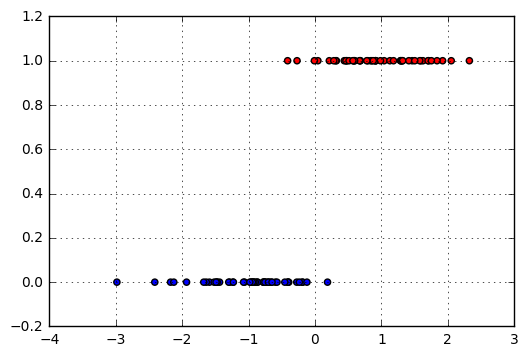

In [54]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x, y, c=y, cmap=clrMap)
plt.grid(True)
plt.show()

In [55]:
#Опционально
#count = 0
#while count < 20:
#    indx = np.random.randint(low=0, high=len(x), size=1)
    
#    if y[indx] > 0:
#        x[indx,0] += 10
#        count += 1

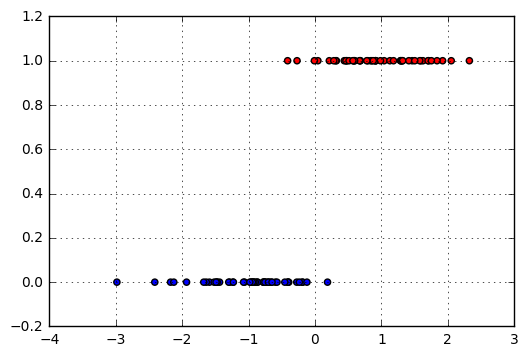

In [56]:
plt.scatter(x, y, c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [58]:
logReg1D = linear_model.LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, 
                                         solver="lbfgs", random_state=12345)

In [59]:
logReg1D.fit(x_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=12345,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [60]:
logReg1D.coef_

array([[ 6.1436941]])

In [61]:
logReg1D.intercept_

array([ 0.23987693])

In [62]:
f = lambda x: 1 / (1+np.exp(-(logReg1D.intercept_+logReg1D.coef_[0]*x)))
#f = lambda x: 1 / (1+np.exp(-(15*x+1)))

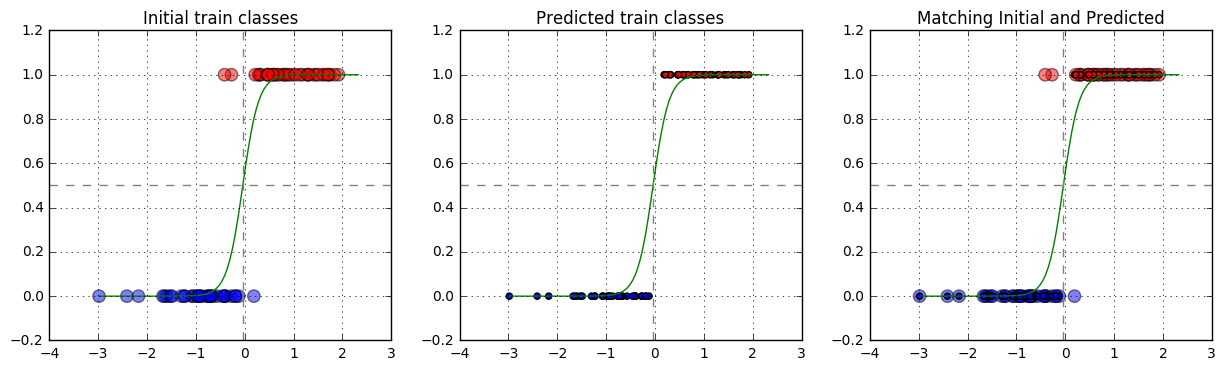

In [63]:
thresholdY = 0.5
thresholdX = (np.log((1-thresholdY)/thresholdY) - logReg1D.intercept_)/logReg1D.coef_[0]

xx = np.linspace(x.min(), x.max(), 100)

def plotLogRegTrain1D():
    plt.figure(1, figsize=[15,4])

    plt.subplot(1,3,1)
    plt.title("Initial train classes")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_train, y_train, c=y_train, cmap=clrMap, s=80, alpha=0.5)
    plt.axhline(thresholdY, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,2)
    plt.title("Predicted train classes")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_train, logReg1D.predict(x_train), s=20, c=logReg1D.predict(x_train), cmap=clrMap)
    plt.axhline(thresholdY, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,3)
    plt.title("Matching Initial and Predicted")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_train, y_train, c=y_train, cmap=clrMap, s=80, alpha=0.5)
    plt.scatter(x_train, logReg1D.predict(x_train), s=20, c=logReg1D.predict(x_train), cmap=clrMap)
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)
    
plotLogRegTrain1D()
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [64]:
score = logReg1D.score(x_test, y_test)
score

1.0

In [65]:
test_pred

NameError: name 'test_pred' is not defined

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == logReg1D.predict(x_test[i].reshape(-1,1)):
        count += 1
print(count/len(y_test))   

In [ ]:
test_pred = logReg1D.predict(x_test)
np.where(test_pred==y_test)[0].size / y_test.size

In [ ]:
logReg1D.predict_proba(x_test)

In [ ]:
for i in range(len(x_test)):
    p = np.around(logReg1D.predict_proba(x_test[i]), decimals=5).ravel()
    print("Point:", x_test[i])
    print("Class 0:", p[0], end="; ")
    print("Class 1:", p[1], end="; ")
    print("Predicted Class:", logReg1D.predict(x_test[i])[0], end="; ")
    print("Actual Class:", y_test[i])

In [ ]:
def plotLogRegTest1D():
    plt.figure(1, figsize=[15,4])

    plt.subplot(1,3,1)
    plt.title("Initial train classes")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_test, y_test, c=y_test, cmap=clrMap, s=80, alpha=0.5)
    plt.axhline(thresholdY, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,2)
    plt.title("Predicted train classes")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_test, logReg1D.predict(x_test), s=20, c=logReg1D.predict(x_test), cmap=clrMap)
    plt.axhline(thresholdY, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,3)
    plt.title("Matching Initial and Predicted")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_test, y_test, c=y_test, cmap=clrMap, s=80, alpha=0.5)
    plt.scatter(x_test, logReg1D.predict(x_test), s=20, c=logReg1D.predict(x_test), cmap=clrMap)
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)
    
plotLogRegTest1D()
plt.show()

<p><b>Графики</b></p>

In [ ]:
plotLogRegTrain1D()
plt.show()
plotLogRegTest1D()
plt.show()

<p><b>2D</b></p>

<p><b>Исходные данные</b></p>

In [ ]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.25,
                           random_state=19)

In [ ]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [ ]:
logReg = linear_model.LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, 
                                         solver="lbfgs", random_state=1234)

In [ ]:
logReg.fit(x_train, y_train)

In [ ]:
logReg.coef_

In [ ]:
logReg.intercept_

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=logReg.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [ ]:
score = logReg.score(x_test, y_test)
score

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == logReg.predict(x_test[i].reshape(-1,2)):
        count += 1
print(count/len(y_test))        

In [ ]:
logReg.predict_proba(x_test)

In [ ]:
z = lambda x: logReg.intercept_[0] + logReg.coef_[0,0]*x[0] + logReg.coef_[0,1]*x[1]
z(x_test[0,:])

In [ ]:
zVal = z(x_test[0,:])
p = np.around(np.exp(zVal) / (np.exp(zVal) + 1), decimals=2)
p

In [ ]:
for i in range(len(x_test)):
    zVal = z(x_test[i,:])
    p = np.around(np.exp(zVal) / (np.exp(zVal) + 1), decimals=2)
    print("Point:", x_test[i,:])
    print("Class 0:", 1 - p, end="; ")
    print("Class 1:", p, end="; ")
    print("Predicted Class:", logReg.predict(x_test[i,:])[0], end="; ")
    print("Actual Class:", y_test[i])

In [ ]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=logReg.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

In [ ]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
#xx[:,:], yy[:,:]

In [ ]:
xx.ravel(), yy.ravel()

In [ ]:
points = np.c_[xx.ravel(), yy.ravel()]
#points[:3]

In [ ]:
points_2 = list(zip(xx.ravel(), yy.ravel()))
#points_2[40:50]

In [ ]:
Z = logReg.predict_proba(points)[:, 1]
Z = Z.reshape(xx.shape)
#Z

In [ ]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=logReg.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=logReg.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Пример с тремя классами</b></p>

<p><b>Исходные данные</b></p>

In [ ]:
n = 100
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)

In [ ]:
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [ ]:
logRegMultClass = linear_model.LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, 
                                         solver="lbfgs", multi_class="ovr", random_state=12345)

In [ ]:
logRegMultClass.fit(x_train, y_train)

In [ ]:
logRegMultClass.coef_

In [ ]:
logRegMultClass.intercept_

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=logRegMultClass.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [ ]:
score = logRegMultClass.score(x_test, y_test)
score

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == logRegMultClass.predict(x_test[i]):
        count += 1
print(count/len(y_test))    

In [ ]:
pr = np.around(logRegMultClass.predict_proba(x_test), decimals=2)
pr = np.column_stack((pr, logRegMultClass.predict(x_test)))

#Class_0, Class_1, Class_2, Prediction
pr

In [ ]:
z_cl_0 = lambda x: logRegMultClass.intercept_[0] + logRegMultClass.coef_[0,0]*x[:,0] + logRegMultClass.coef_[0,1]*x[:,1]
z_cl_1 = lambda x: logRegMultClass.intercept_[1] + logRegMultClass.coef_[1,0]*x[:,0] + logRegMultClass.coef_[1,1]*x[:,1]
z_cl_2 = lambda x: logRegMultClass.intercept_[2] + logRegMultClass.coef_[2,0]*x[:,0] + logRegMultClass.coef_[2,1]*x[:,1]

zVal_cl_0 = z_cl_0(x_test)
zVal_cl_1 = z_cl_1(x_test)
zVal_cl_2 = z_cl_2(x_test)

p_cl_0 = np.around(np.exp(zVal_cl_0) / (np.exp(zVal_cl_0) + 1), decimals=2)
p_cl_1 = np.around(np.exp(zVal_cl_1) / (np.exp(zVal_cl_1) + 1), decimals=2)
p_cl_2 = np.around(np.exp(zVal_cl_2) / (np.exp(zVal_cl_2) + 1), decimals=2)

st = np.column_stack((p_cl_0, p_cl_1, p_cl_2))
st = np.column_stack((st, st.argmax(axis=1)))

#Class_0, Class_1, Class_2, Prediction
st

In [ ]:
for i in range(len(x_test)):
    p_vals = np.around(logRegMultClass.predict_proba(x_test[i]), decimals=2)
    print("Point:", x_test[i,:])
    print("Class 0:", p_vals[0,0], end="; ")
    print("Class 1:", p_vals[0,1], end="; ")
    print("Class 2:", p_vals[0,2], end="; ")
    print("Predicted Class:", logRegMultClass.predict(x_test[i,:])[0], end="; ")
    print("Actual Class:", y_test[i])

In [ ]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=logRegMultClass.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

In [ ]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
#xx[:,:3], yy[:,:3]

In [ ]:
points = np.c_[xx.ravel(), yy.ravel()]
Z = logRegMultClass.predict(points)
Z = Z.reshape(xx.shape)
#Z

In [ ]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=logRegMultClass.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=logRegMultClass.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Наивный байесовский классификатор</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/naive_bayes.html">1.9. Naive Bayes</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB">GaussianNB</a>

In [ ]:
from sklearn.naive_bayes import GaussianNB

<p><b>Исходные данные</b></p>

In [ ]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.25,
                           random_state=19)

In [ ]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [ ]:
nBClass = GaussianNB()
nBClass.fit(x_train, y_train)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=nBClass.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [ ]:
score = nBClass.score(x_test, y_test)
score

In [ ]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=nBClass.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

In [ ]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
xx[:,:3], yy[:,:3]

points = np.c_[xx.ravel(), yy.ravel()]

Z = nBClass.predict_proba(points)[:, 1]
Z = Z.reshape(xx.shape)

In [ ]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=nBClass.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=nBClass.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<a name="5"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">5. Метод опорных векторов (SVM)</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/svm.html">1.4. Support Vector Machines</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">sklearn.svm.SVC</a><br>
<a href="http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html">SVM Margins Example</a>

In [ ]:
from sklearn import svm

<p><b>Исходные данные</b></p>

In [ ]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.25,
                           random_state=19)

In [ ]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [ ]:
svmCl = svm.SVC(kernel="linear")

In [ ]:
svmCl.fit(x_train, y_train)  

In [ ]:
svmCl.support_vectors_

In [ ]:
svmCl.support_ 

In [ ]:
svmCl.n_support_

In [ ]:
svmCl.coef_

In [ ]:
svmCl.intercept_

In [ ]:
f = lambda x: svmCl.intercept_[0] + svmCl.coef_[0,0]*x[:,0] + svmCl.coef_[0,1]*x[:,1]

In [ ]:
w = svmCl.coef_[0]
a = -w[0] / w[1]
xx1 = np.linspace(x[:,0].min(), x[:,0].max())
xx2 = a * xx1 - (svmCl.intercept_[0]) / w[1]

In [ ]:
margin = 1 / np.sqrt(np.sum(svmCl.coef_ ** 2))
xx2_down = xx2 + a * margin
xx2_up = xx2 - a * margin

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=svmCl.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)
plt.plot(xx1, xx2, 'k-')
plt.plot(xx1, xx2_down, 'k--')
plt.plot(xx1, xx2_up, 'k--')
plt.scatter(svmCl.support_vectors_[:,0], svmCl.support_vectors_[:,1], c=svmCl.predict(svmCl.support_vectors_), facecolors="none",
            s=150, cmap=clrMap)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [ ]:
score = svmCl.score(x_test, y_test)
score

In [ ]:
np.around(svmCl.decision_function(x_test), decimals=2)

In [ ]:
np.around(f(x_test), decimals=2)

In [ ]:
svmCl.predict(x_test)

In [ ]:
for i in range(len(x_test)):
    p_vals = np.around(svmCl.decision_function(x_test[i]), decimals=2)
    print("Point:", x_test[i,:])
    print("Value: ", p_vals, end="; ")
    print("Predicted Class:", svmCl.predict(x_test[i,:])[0], end="; ")
    print("Actual Class:", y_test[i])

<p><b>Графики</b></p>

In [ ]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=svmCl.predict(x_train), s=20, cmap=clrMap)
plt.plot(xx1, xx2, 'k-')
plt.plot(xx1, xx2_down, 'k--')
plt.plot(xx1, xx2_up, 'k--')
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=svmCl.predict(x_test), s=20, cmap=clrMap)
plt.plot(xx1, xx2, 'k-')
plt.plot(xx1, xx2_down, 'k--')
plt.plot(xx1, xx2_up, 'k--')
plt.grid(True)

plt.show()

<a name="6"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">6. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#example-datasets-plot-random-dataset-py">Plot randomly generated classification dataset</a><br>
<a href="http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#example-classification-plot-classifier-comparison-py">Classifier comparison</a>